### 工蜂 vs 帶花粉工蜂「進出量比較」折線圖

/var/folders/_1/jbb6qwxn77g6jx0tdbwqv5j80000gn/T/ipykernel_1929/4203669909.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["dt"] = pd.to_datetime(df["dt"], errors="raise", infer_datetime_format=True)


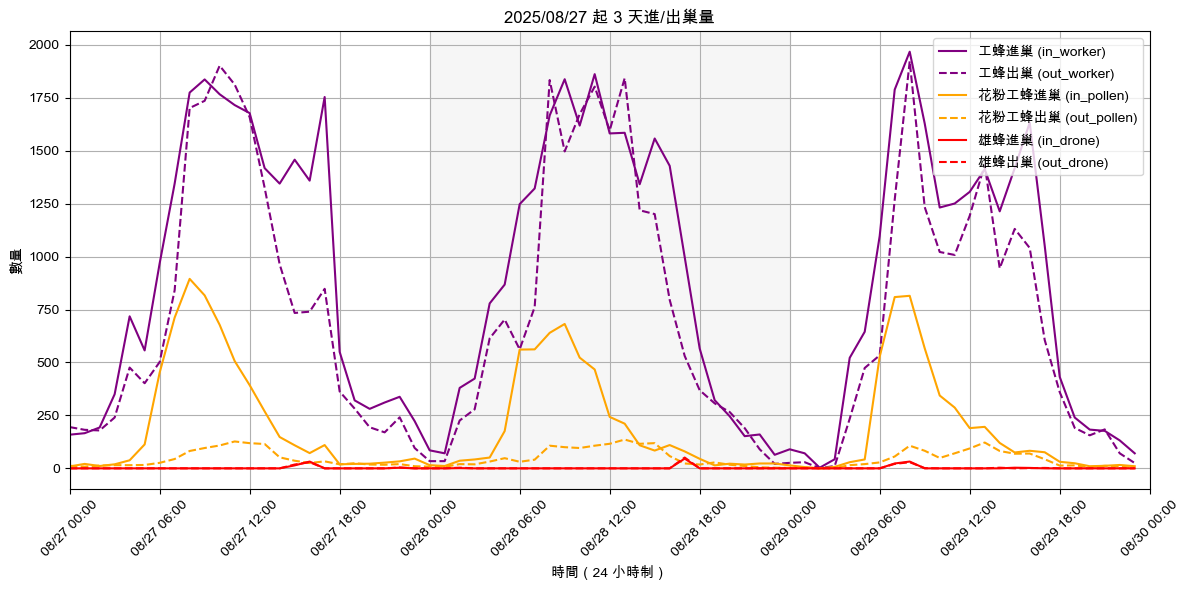

In [35]:
CSV_PATH = "/Users/jameschen/Desktop/進出量資料分析/2025-08_inout.csv"
START = "2025-08-27"      # 起始日期
DAYS = 3                  # 天數
TICK_HOURS = 6            # 橫軸刻度間隔（小時）

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta

def main():
    matplotlib.rc('font', family='Arial Unicode Ms')

    # 讀 CSV
    df = pd.read_csv(CSV_PATH)

    # 必要欄位檢查
    need = ["dt", "in_worker", "out_worker", "inpollen", "outpollen", "in_drone", "out_drone"]
    miss = [c for c in need if c not in df.columns]
    if miss:
        raise ValueError(f"CSV 缺少欄位：{miss}（需要 {need}）")

    # 時間轉換
    try:
        df["dt"] = pd.to_datetime(df["dt"], errors="raise", infer_datetime_format=True)
    except Exception:
        try:
            df["dt"] = pd.to_datetime(df["dt"], format="%Y/%m/%d %H:%M")
        except Exception:
            df["dt"] = pd.to_datetime(df["dt"], format="%Y-%m-%d %H:%M")

    start = pd.to_datetime(START).replace(hour=0, minute=0, second=0)
    end = start + timedelta(days=DAYS)
    dff = df.loc[(df["dt"] >= start) & (df["dt"] < end)].copy()
    if dff.empty:
        raise ValueError(f"指定範圍 {START} ~ {(end - timedelta(seconds=1)).date()} 無資料")

    # 繪圖
    fig, ax = plt.subplots(figsize=(12, 6))

    # 工蜂：紫
    ax.plot(dff["dt"], dff["in_worker"],  label="工蜂進巢 (in_worker)", color="purple", linewidth=1.5)
    ax.plot(dff["dt"], dff["out_worker"], label="工蜂出巢 (out_worker)", color="purple", linestyle="--", linewidth=1.5)

    # 花粉工蜂：橘
    ax.plot(dff["dt"], dff["inpollen"],   label="花粉工蜂進巢 (in_pollen)", color="orange", linewidth=1.5)
    ax.plot(dff["dt"], dff["outpollen"],  label="花粉工蜂出巢 (out_pollen)", color="orange", linestyle="--", linewidth=1.5)

    # 雄蜂：紅
    ax.plot(dff["dt"], dff["in_drone"],   label="雄蜂進巢 (in_drone)", color="red", linewidth=1.5)
    ax.plot(dff["dt"], dff["out_drone"],  label="雄蜂出巢 (out_drone)", color="red", linestyle="--", linewidth=1.5)

    # 底色交錯：奇數天塗灰色
    for i in range(DAYS):
        day_start = start + timedelta(days=i)
        day_end   = day_start + timedelta(days=1)
        if i % 2 == 1:  # 偶數 i 保持白色，奇數 i 塗灰色
            ax.axvspan(day_start, day_end, color="lightgray", alpha=0.2)

    # 標題與樣式
    ax.set_title(f"{start:%Y/%m/%d} 起 {DAYS} 天進/出巢量")
    ax.set_xlabel("時間（24 小時制）")
    ax.set_ylabel("數量")
    ax.legend(loc="upper right")
    ax.grid(True)

    ax.xaxis.set_major_locator(mdates.HourLocator(interval=TICK_HOURS))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d %H:%M"))
    ax.set_xlim(start, end)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


### 三天「花粉率」折線圖

/var/folders/_1/jbb6qwxn77g6jx0tdbwqv5j80000gn/T/ipykernel_1929/2881885903.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["dt"] = pd.to_datetime(df["dt"], errors="raise", infer_datetime_format=True)


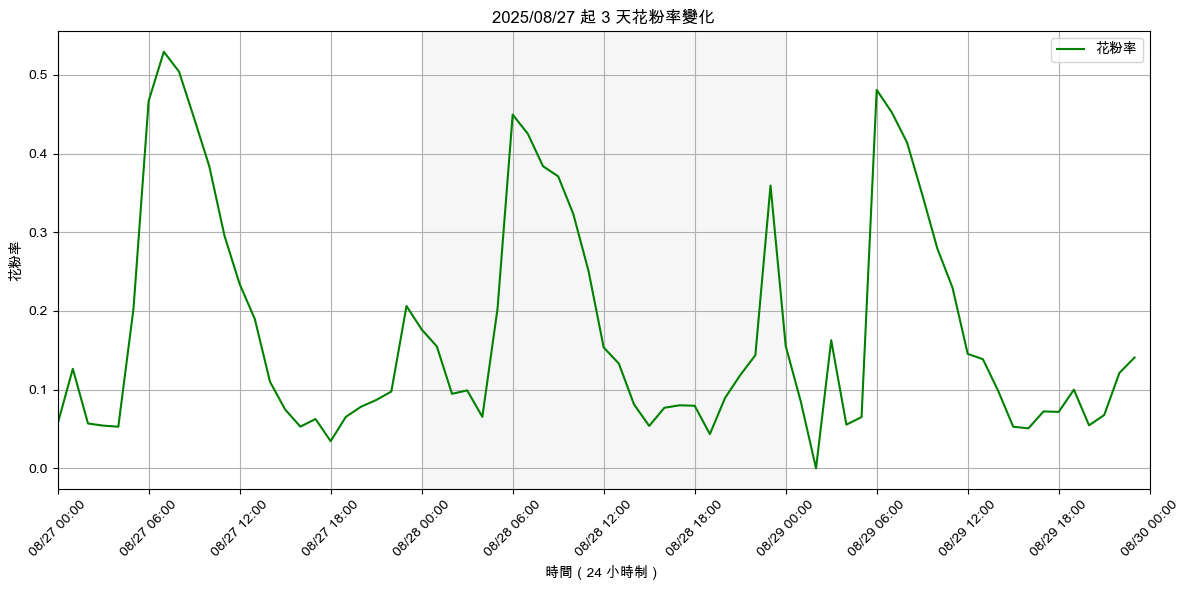

In [36]:
CSV_PATH_OR_URL = "/Users/jameschen/Desktop/進出量資料分析/2025-08_inout.csv"  
START = "2025-08-27"      # 起始日期
DAYS = 3                  # 天數
TICK_HOURS = 6            # 橫軸刻度間隔（小時）

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta

def main():
    matplotlib.rc('font', family='Arial Unicode Ms')
    
    # 讀 CSV
    df = pd.read_csv(CSV_PATH_OR_URL)

    # 必要欄位檢查
    need = ["dt", "pollen_rate"]
    miss = [c for c in need if c not in df.columns]
    if miss:
        raise ValueError(f"CSV 缺少欄位：{miss}（需要 {need}）")

    # 時間轉換
    try:
        df["dt"] = pd.to_datetime(df["dt"], errors="raise", infer_datetime_format=True)
    except Exception:
        try:
            df["dt"] = pd.to_datetime(df["dt"], format="%Y/%m/%d %H:%M")
        except Exception:
            df["dt"] = pd.to_datetime(df["dt"], format="%Y-%m-%d %H:%M")

    # 起始日強制對齊 00:00
    start = pd.to_datetime(START).replace(hour=0, minute=0, second=0)
    end = start + timedelta(days=DAYS)
    dff = df.loc[(df["dt"] >= start) & (df["dt"] < end)].copy()
    if dff.empty:
        raise ValueError(f"指定範圍 {START} ~ {(end - timedelta(seconds=1)).date()} 無資料")

    # 繪圖
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(dff["dt"], dff["pollen_rate"].astype(float), 
            label="花粉率", color="green", linewidth=1.5, linestyle='-')
    
    # 底色交錯：奇數天塗灰
    for i in range(DAYS):
        day_start = start + timedelta(days=i)
        day_end   = day_start + timedelta(days=1)
        if i % 2 == 1:
            ax.axvspan(day_start, day_end, color="lightgray", alpha=0.2)

    ax.set_title(f"{start:%Y/%m/%d} 起 {DAYS} 天花粉率變化")
    ax.set_xlabel("時間（24 小時制）")
    ax.set_ylabel("花粉率")
    ax.legend(loc="upper right")
    ax.grid(True)

    ax.xaxis.set_major_locator(mdates.HourLocator(interval=TICK_HOURS))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d %H:%M"))
    ax.set_xlim(start, end)   
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


### 一日內進出量分析

/var/folders/_1/jbb6qwxn77g6jx0tdbwqv5j80000gn/T/ipykernel_1929/1558346011.py:20: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["dt"] = pd.to_datetime(df["dt"], errors="raise", infer_datetime_format=True)


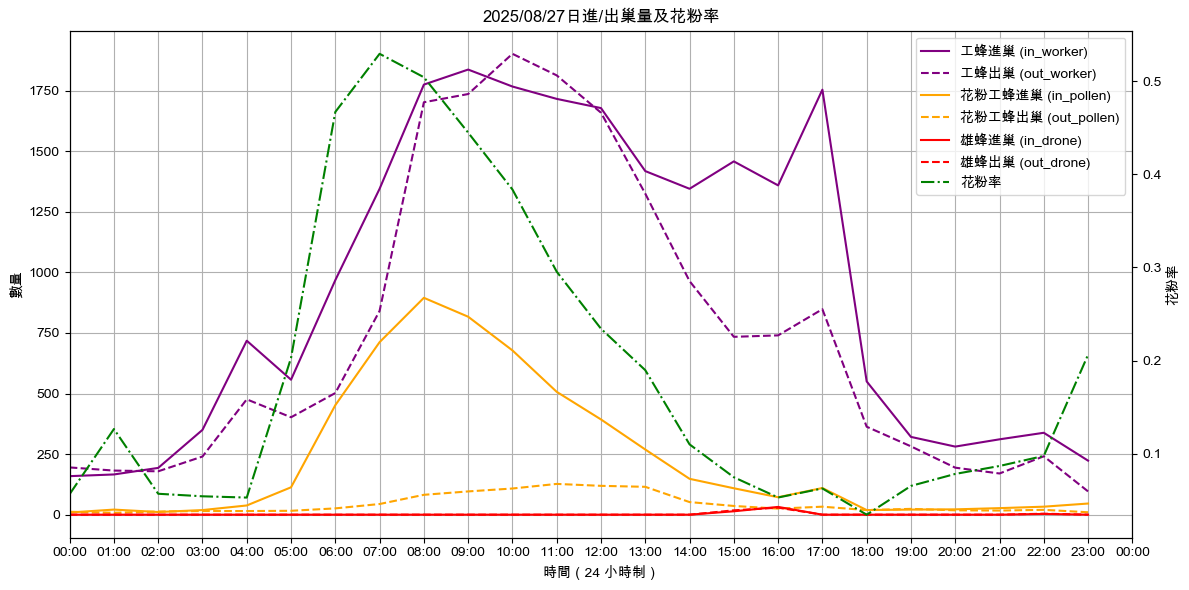

In [26]:
CSV_PATH = "/Users/jameschen/Desktop/進出量資料分析/2025-08_inout.csv"
START = "2025-08-27"      # 起始日期
DAYS = 1                  # 連續天數
TICK_HOURS = 1            # 橫軸刻度：每小時

from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def load_and_prepare(path):
    df = pd.read_csv(path)
    need_cols = ["dt", "in_worker", "out_worker", "inpollen", "outpollen", "pollen_rate", "in_drone", "out_drone"]
    miss = [c for c in need_cols if c not in df.columns]
    if miss:
        raise ValueError(f"CSV 缺少欄位：{miss}（需要 {need_cols}）")

    # 時間轉換
    try:
        df["dt"] = pd.to_datetime(df["dt"], errors="raise", infer_datetime_format=True)
    except Exception:
        try:
            df["dt"] = pd.to_datetime(df["dt"], format="%Y/%m/%d %H:%M")
        except Exception:
            df["dt"] = pd.to_datetime(df["dt"], format="%Y-%m-%d %H:%M")

    # 強制數值
    for c in need_cols[1:]:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def daily_slice(df, day_start):
    # 固定從 00:00 開始到隔天 00:00 結束
    day_start = pd.to_datetime(day_start).replace(hour=0, minute=0, second=0, microsecond=0)
    day_end = day_start + timedelta(days=1)
    return df[(df["dt"] >= day_start) & (df["dt"] < day_end)].copy(), day_start, day_end

def plot_day(d, day_start, day_end, tick_hours):
    if d.empty:
        print(f"[警告] {day_start.date()} 無資料，跳過繪圖。")
        return

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # 左軸：工蜂、花粉蜂、雄蜂（雄蜂紅色）
    L1, = ax1.plot(d["dt"], d["in_worker"],  label="工蜂進巢 (in_worker)", color="purple", linewidth=1.5)
    L2, = ax1.plot(d["dt"], d["out_worker"], label="工蜂出巢 (out_worker)", color="purple", linestyle="--", linewidth=1.5)
    L3, = ax1.plot(d["dt"], d["inpollen"],   label="花粉工蜂進巢 (in_pollen)", color="orange", linewidth=1.5)
    L4, = ax1.plot(d["dt"], d["outpollen"],  label="花粉工蜂出巢 (out_pollen)", color="orange", linestyle="--", linewidth=1.5)
    D1, = ax1.plot(d["dt"], d["in_drone"],   label="雄蜂進巢 (in_drone)",  color="red", linewidth=1.5)
    D2, = ax1.plot(d["dt"], d["out_drone"],  label="雄蜂出巢 (out_drone)", color="red", linestyle="--", linewidth=1.5)

    ax1.set_xlabel("時間（24 小時制）")
    ax1.set_ylabel("數量")
    ax1.grid(True)

    # 右軸：花粉率
    ax2 = ax1.twinx()
    R1, = ax2.plot(d["dt"], d["pollen_rate"], label="花粉率", color="green", linestyle="-.", linewidth=1.5)
    ax2.set_ylabel("花粉率")

    # 時間刻度與範圍（固定 00:00 ~ 24:00）
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=tick_hours))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax1.set_xlim(day_start, day_end)
    plt.xticks(rotation=45)

    # 合併圖例 
    lines = [L1, L2, L3, L4, D1, D2, R1]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc="upper right")

    plt.title(f"{day_start:%Y/%m/%d}日進/出巢量及花粉率")
    plt.tight_layout()
    plt.show()

def main():
    df = load_and_prepare(CSV_PATH)
    # 保證每個循環的 day_start 都是當天 00:00
    start0 = pd.to_datetime(START).replace(hour=0, minute=0, second=0, microsecond=0)
    for i in range(DAYS):
        day_start = start0 + timedelta(days=i)
        d, s, e = daily_slice(df, day_start)
        plot_day(d, s, e, TICK_HOURS)

if __name__ == "__main__":
    main()
